In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv(r"C:\Users\subha\Downloads\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


PREPROCESSING OF DATA

1.Handling Null values

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

2.Label Encoding

In [8]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
df.value_counts("Geography")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df.value_counts("Gender")

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df["Gender"]=df["Gender"].astype("category")
df["Gender"]=df["Gender"].cat.codes

In [12]:
df["Geography"]=df["Geography"].astype("category")
df["Geography"]=df["Geography"].cat.codes

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


3.Outlier Detection

In [15]:
df1=df.drop(["Exited"],axis=1)

In [16]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52


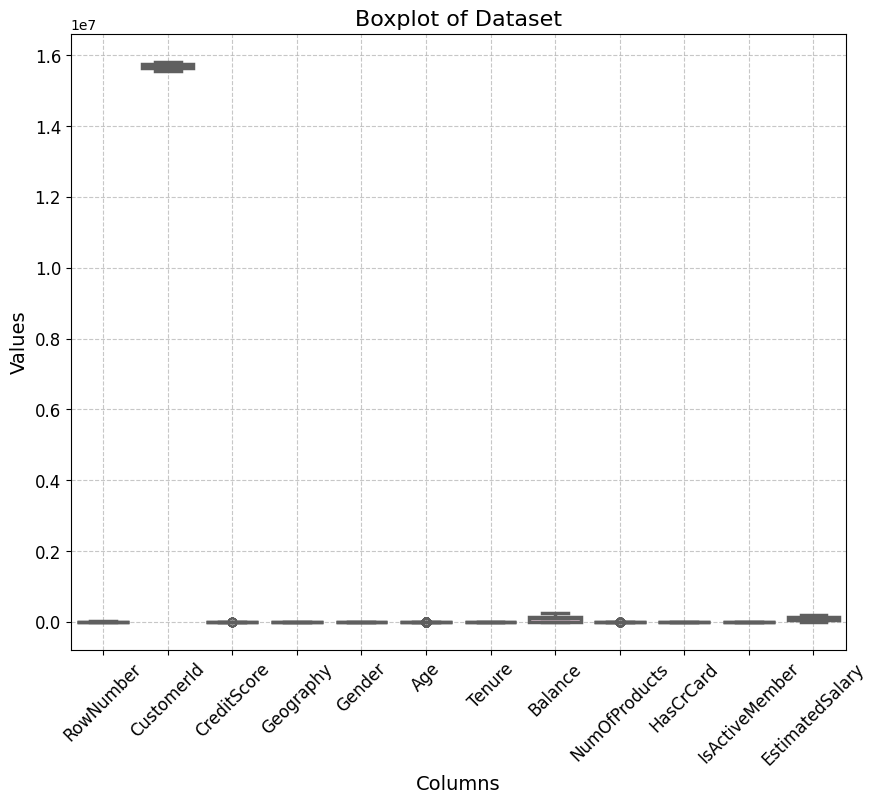

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))  

sns.boxplot(data=df1, palette='Set3', linewidth=2.5)

plt.title('Boxplot of Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


4.Scaling

In [18]:
X=df1.drop(["Surname"],axis=1)
Y=df["Exited"]

In [19]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[0.00000000e+00, 2.75616127e-01, 5.38000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 5.06734893e-01],
       [1.00010001e-04, 3.26454364e-01, 5.16000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 5.62708739e-01],
       [2.00020002e-04, 2.14421435e-01, 3.04000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 5.69654352e-01],
       ...,
       [9.99799980e-01, 7.53273144e-02, 7.18000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.10390092e-01],
       [9.99899990e-01, 4.66636532e-01, 8.44000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 4.64429053e-01],
       [1.00000000e+00, 2.50483021e-01, 8.84000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.90914232e-01]])

In [20]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0000,0.275616,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.0001,0.326454,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.0002,0.214421,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.0003,0.542636,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0.0004,0.688778,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


checking for multi collinearity

<Axes: >

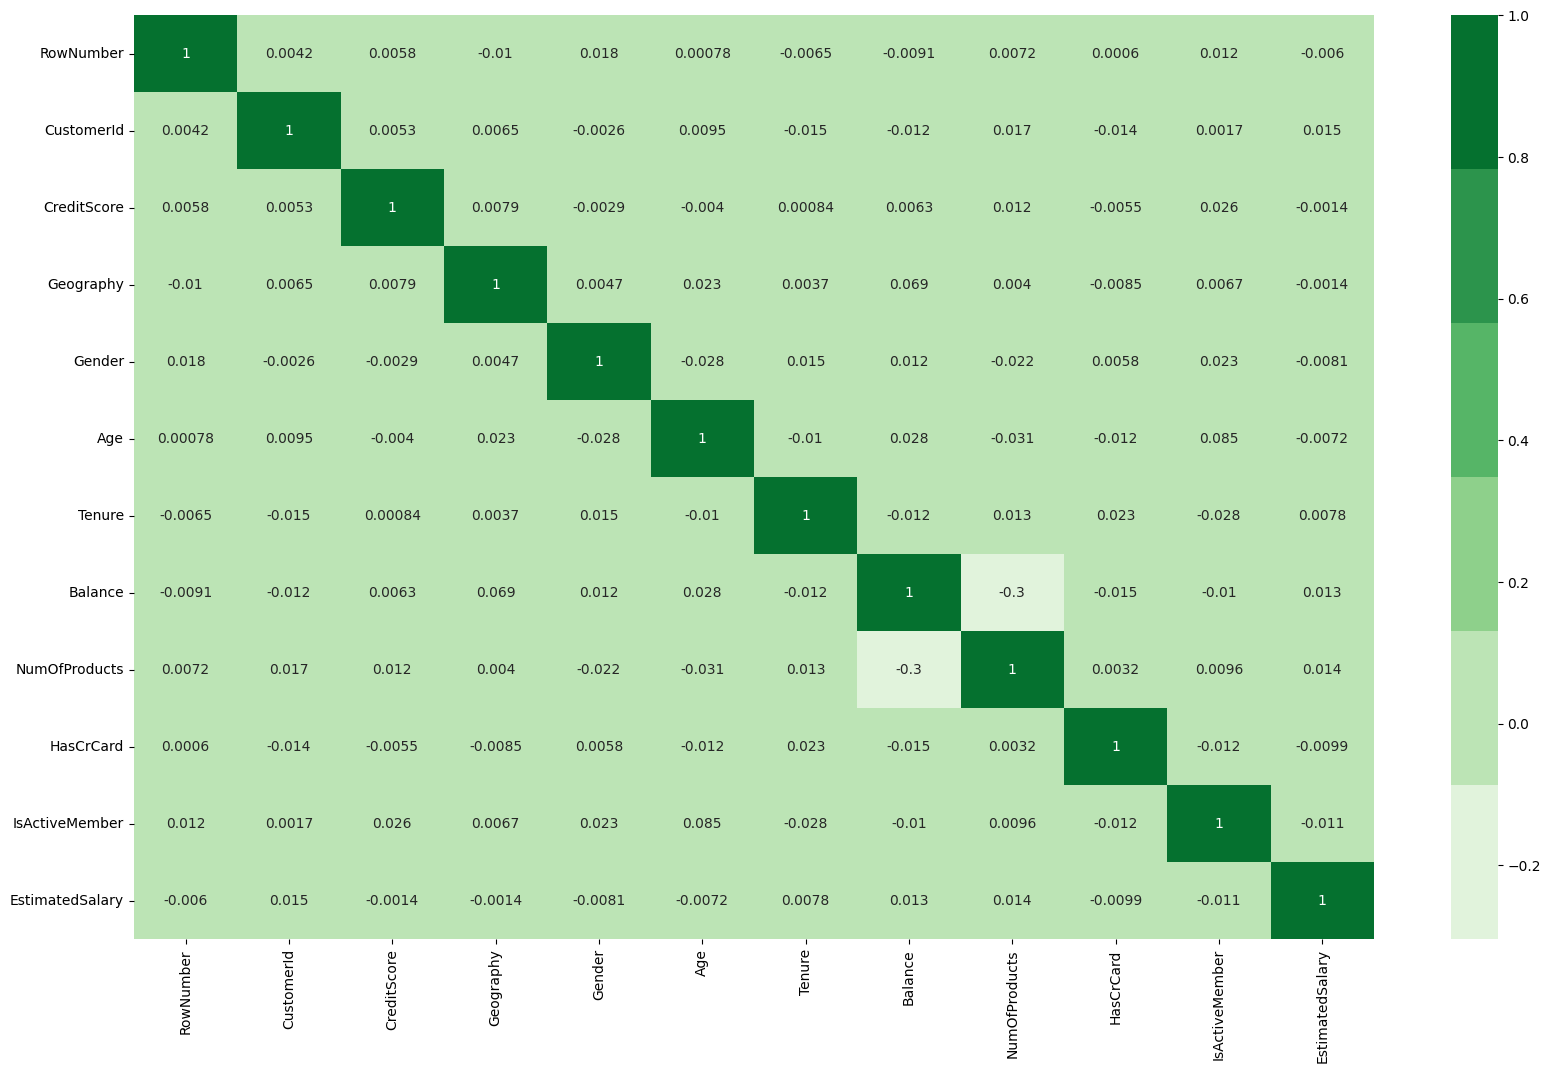

In [21]:
plt.figure(figsize=(20,12))
colormap = sns.color_palette("Greens") 
sns.heatmap(X_scaled.corr(),annot=True,cmap=colormap)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100,stratify=Y)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [26]:
from sklearn.linear_model import LogisticRegression
log_mod=LogisticRegression()
log_mod.fit(X_train,Y_train)
Y_train_predict=log_mod.predict(X_train)
Y_predict_test=log_mod.predict(X_test)
acc=accuracy_score(Y_train,Y_train_predict)
print(f'Accuracy in training: {acc:.2f}')
acc1=accuracy_score(Y_test,Y_predict_test)
print(f"Accuracy in testing :{acc:.2f}")


Accuracy in training: 0.80
Accuracy in testing :0.80


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

Y_train_predict=best_model.predict(X_train)
Y_predict_test=best_model.predict(X_test)
acc=accuracy_score(Y_train,Y_train_predict)
print(f'Accuracy in training: {acc:.2f}')
acc1=accuracy_score(Y_test,Y_predict_test)
print(f"Accuracy in testing :{acc:.2f}")

Accuracy in training: 0.94
Accuracy in testing :0.94


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, Y_train)
Y_train_predict=gbc.predict(X_train)
Y_predict_test=gbc.predict(X_test)
acc=accuracy_score(Y_train,Y_train_predict)
print(f'Accuracy in training: {acc:.2f}')
acc1=accuracy_score(Y_test,Y_predict_test)
print(f"Accuracy in testing :{acc:.2f}")


Accuracy in training: 0.88
Accuracy in testing :0.88
